In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


# change to working tensorflow directory on the drive
%cd '/content/gdrive/My Drive/Dataset/'

Mounted at /content/gdrive
/content/gdrive/My Drive/Dataset


<b>Importing the libraries and getting the input

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Input, Lambda, Flatten
from keras.models import Sequential
from tensorflow import random
from tensorflow.keras.applications.inception_v3 import preprocess_input
from glob import glob
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [3]:
IMAGE_SIZE = [224, 224]

<b>Getting the imagenet weights

In [4]:
np.random.seed(42)
random.set_seed(42)

vgg_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [5]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights
for layer in vgg_model.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/gdrive/MyDrive/Dataset/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg_model.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg_model.input, outputs=prediction)



<b>Getting the summary of the  model

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b>Generating the images using ImageDataGenerator

In [12]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

In [13]:
training_dataset = generate_train_data.flow_from_directory('/content/gdrive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_datasetset = generate_test_data.flow_from_directory('/content/gdrive/MyDrive/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 743 images belonging to 15 classes.
Found 318 images belonging to 15 classes.


<b>Trainng our model

In [15]:
history=model.fit_generator(training_dataset,
                         steps_per_epoch = len(training_dataset),
                         epochs = 7,
                         validation_data = test_datasetset,
                         validation_steps = len(test_datasetset),
                         shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
24/24 [==============================] - 550s 23s/step - loss: 0.1661 - accuracy: 0.9812 - val_loss: 0.8096 - val_accuracy: 0.7925
Epoch 2/7
24/24 [==============================] - 543s 23s/step - loss: 0.1503 - accuracy: 0.9825 - val_loss: 0.8362 - val_accuracy: 0.7704
Epoch 3/7
24/24 [==============================] - 617s 26s/step - loss: 0.1073 - accuracy: 0.9879 - val_loss: 0.8628 - val_accuracy: 0.7736
Epoch 4/7
24/24 [==============================] - 600s 25s/step - loss: 0.0965 - accuracy: 0.9892 - val_loss: 0.8104 - val_accuracy: 0.7799
Epoch 5/7
24/24 [==============================] - 555s 23s/step - loss: 0.0785 - accuracy: 0.9933 - val_loss: 0.8274 - val_accuracy: 0.7704
Epoch 6/7
24/24 [==============================] - 564s 24s/step - loss: 0.0738 - accuracy: 0.9960 - val_loss: 0.8089 - val_accuracy: 0.7925
Epoch 7/7
24/24 [==============================] - 558s 23s/step - loss: 0.0676 - accuracy: 0.9960 - val_loss: 0.7922 - val_accuracy: 0.7956


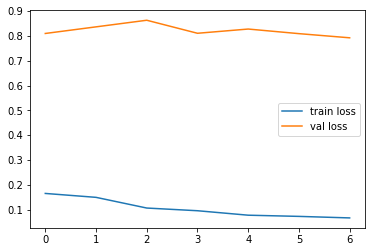

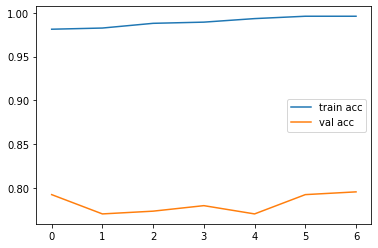

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('Car_prediction_model_VGG16.h5')

In [18]:

y_pred = model.predict(test_datasetset)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
from keras.models import load_model
from keras.preprocessing import image

In [21]:
model=load_model('Car_prediction_model_VGG16.h5')


<b> Checking the model on a image

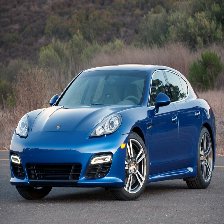

In [28]:
img=image.load_img('/content/gdrive/MyDrive/Dataset/Train/Porsche/00409.jpg',target_size=(224,224))
img

In [37]:
x=image.img_to_array(img)
x=x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
result=np.argmax(model.predict(img_data), axis=1)
if result == 0:
  prediction ="It's an Audi"
elif result == 1:
  prediction = "It's a Bentley"
elif result== 2:
  prediction="It's a BugattiVeyron"
elif result== 3:
  prediction="It's a Cadillac"
elif result== 4:
  prediction="It's a Fiat"
elif result== 5:
  prediction="It's a Ferrar"
elif result== 6:
  prediction="It's a Honda"
elif result== 7:
  prediction="It's a Hyundai"
elif result== 8:
  prediction="It's a Jaguar"
elif result== 9:
  prediction="It's a Jeep"
elif result== 10:
  prediction="It's a Lamborghini"
elif result== 11:
  prediction="It's a Mclaren"
elif result== 12:
  prediction="It's a Mercedes"
elif result== 13:
  prediction="It's a Porsche"
elif result== 14:
  prediction="It's a Rollsroyce"

print(prediction)

It's a Porsche
